# CSE 6369 - Spring 2023 - Homework 1


## Student Name: Gaurav Dilip Nale


## Student ID: 1001859699

# Install packages

In [37]:
pwd

'/content'

In [6]:
cd /content/

/content


In [1]:
from google.colab import files
upload = files.upload()

Saving learning_algorithms.py to learning_algorithms.py


In [2]:
|!pip install gymnasium==0.27.1 -q
!pip install gymnasium[box2d] -q
!pip install moviepy -q
!pip install -U kora -q

# Import libraries

In [1]:
import pickle
import random
import argparse
import moviepy
import matplotlib.pyplot as plt
import seaborn as sns
from kora.drive import upload_public
from google.colab import drive

drive.mount('/content/gdrive')
%cd gdrive/MyDrive/assign_01/

import sys
sys.path.insert(0, 'content/gdrive/MyDrive/CSE 6369')

from learning_algorithms import PGTrainer
from utils import seed_everything

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/MyDrive/assign_01/'
/content


# Train an agent

In [13]:
# set simulation parameters
params = {
    'env_name': 'CartPole-v1',
    'rng_seed': 6369,
    'reward_to_go': True,
    'reward_discount': False,
    'n_rollout': 10,
    'n_trajectory_per_rollout': 2,
    'hidden_dim': 32,
    'lr': 3e-3,
    'exp_name': 'CartPole_v1_t0'
}

# Seed RNGs
seed_everything(params['rng_seed'])

# Train agent
trainer = PGTrainer(params)
trainer.run_training_loop()

End of rollout 0: Average trajectory reward is  15.00
End of rollout 1: Average trajectory reward is  23.50
End of rollout 2: Average trajectory reward is  20.50
End of rollout 3: Average trajectory reward is  35.50
End of rollout 4: Average trajectory reward is  39.00
End of rollout 5: Average trajectory reward is  32.50
End of rollout 6: Average trajectory reward is  20.00
End of rollout 7: Average trajectory reward is  28.50
End of rollout 8: Average trajectory reward is  13.00
End of rollout 9: Average trajectory reward is  23.00
Moviepy - Building video /content/CartPole/rl-video-episode-0.mp4.
Moviepy - Writing video /content/CartPole/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/CartPole/rl-video-episode-0.mp4


# Display Video

In [14]:
# (ref: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive)
# Upload video
url = upload_public('CartPole/rl-video-episode-0.mp4')
# Then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

# Visualize learning curve

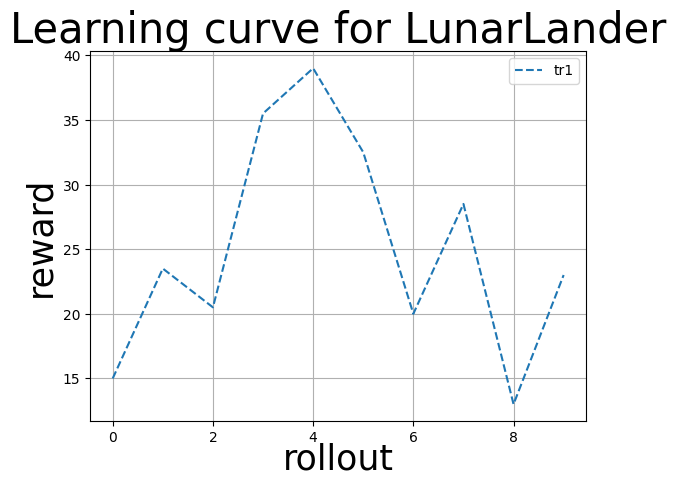

In [15]:
# (ref: http://rail.eecs.berkeley.edu/deeprlcourse/static/misc/viz.pdf)
file_name = params['exp_name'] + '.pkl'
with open(file_name, 'rb') as f:
    ro_reward = pickle.load(f)

# Plot the data
sns.lineplot(data=ro_reward, linestyle='--', label='tr1')
plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for LunarLander', fontsize=30)
plt.legend()
plt.grid()
plt.show()